In [360]:
import dataclasses
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, hamming_loss, roc_auc_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [361]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bar.schwartz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bar.schwartz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bar.schwartz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [362]:
file_path = "C:/users/bar.schwartz/OneDrive - Playtech/bar's private\excercise/train.json"

In [363]:
class MovieData:
    def __init__(self, json_file_path):
        self.df = pd.DataFrame

        self.__read_json(json_file_path)

    def __read_json(self, json_file_path):
        movies = []
        with open(json_file_path, 'r') as f:
            for line in f:
                data = json.loads(line)
                movies.append(
                    {
                        'title': data.get('title'),
                        'plot_summary': data.get('plot_summary'),
                        'genres': self.__parse_dict_field(data, 'genres'),
                        'release_date': data.get('release_date'),
                        'languages': self.__parse_dict_field(data, 'languages'),
                        'countries': self.__parse_dict_field(data, 'countries'),
                        'feature_length': data.get('feature_length'),
                    }
                )

        self.df = pd.DataFrame(movies)
        self.df = self.df.replace('', np.nan)

    @staticmethod
    def __parse_dict_field(row_data, field_name: str):
        field_value = row_data.get(field_name)
        if field_value:
            return list(row_data[field_name].values())
        return


In [346]:
data = MovieData(file_path)

In [347]:
data.df.head(10)

,title,plot_summary,genres,release_date,languages,countries,feature_length
0,Periya Idathu Penn,Murugappa is a small time farm labourer who l...,[Drama],1963,[Tamil Language],[India],NaN
1,The Flock,A hyper-vigilant agent of the Department of Pu...,"[Thriller, Mystery, Crime Fiction, Drama, Crim...",2007,[English Language],[United States of America],96.0
2,Gang,"Four friends- Gangu , Abdul , Nihal and Gary ...","[Action, Drama]",2000-04-14,[Hindi Language],[India],NaN
3,Daybreak,A married man is having an affair with another...,"[LGBT, Drama, Filipino Movies, World cinema]",2008-02-20,"[Tagalog language, Filipino language, English ...",[Philippines],85.0
4,Tomboy,"The movie concerns the life of Tomasina ""Tommy...","[Romantic comedy, Romance Film, Indie, Comedy]",1985-01-25,[English Language],[United States of America],91.0
5,Thambikottai,Azhagiri and his sister Shanmughapriya are s...,[Action],2011-02-11,[Tamil Language],[India],150.0
6,Knight Rider 2010,"In a Mad Max style future, Jake McQueen is the...",[Drama],1994-02-13,[English Language],[United States of America],92.0
7,Colleen,"Colleen is the manager of a dress shop named ""...","[Musical, Black-and-white]",1936-03-21,[English Language],[United States of America],89.0
8,Slackistan,A young man in his early twenties juggles his ...,"[Drama, Indie]",2010,None,"[United Kingdom, Pakistan]",87.0
9,Odd Obsession,A man who suspects his wife is having an affai...,"[Black comedy, Sex comedy, Comedy-drama, Drama...",1959-06-23,[Japanese Language],[Japan],107.0


In [348]:
data.df['plot_summary'].values[500]

'The story centers on a Voodoo queen using zombies to take revenge on a group of White gangsters: helping her out is the Voodoo lord of the dead, Baron Samedi. The zombies in this film more closely resemble the creatures of voodoo legend - i.e. the walking dead who do the bidding of a human master - than the flesh-eating living dead ghouls now currently popular. According to the film, the zombies are the preserved bodies of slaves brought to the United States from Guinea.\n'

In [349]:
class DataSummary:
    def __init__(self, df):
        self.df = df

    def print_summary(self):
        print(f'Size of DataFrame: {self.df.shape}')
        print(f'Unique Genres: {len(pd.unique(self.df["genres"].explode()))}')
        print(f'Unique Languages: {len(pd.unique(self.df["languages"].explode()))}')
        print(f'Unique Countries: {len(pd.unique(self.df["countries"].explode()))}')
        print(f'rows with any null values: {self.df.isnull().any(axis=1).sum()}')
        print('----')
        print(f'null values: \n{self.df.isnull().sum()}')

        
    def plot_genres(self):
        genres = self.df['genres'].explode().value_counts().sort_values(ascending=False).head(20)
        genres.plot(kind='bar')
        plt.xlabel('Genres')
        plt.ylabel('Count')
        plt.title('Count of Genres')
        plt.show()
        
    def plot_n_genres_per_movie(self):
        self.df['genres'].apply(lambda x: len(x) if x else 0).plot(kind='hist', bins=20)
        plt.xlabel('Number of Genres')
        plt.ylabel('Count')
        plt.title('Number of Genres per Movie')
        plt.show()


In [350]:
data_summary = DataSummary(data.df)
data_summary.print_summary()

Size of DataFrame: (30000, 7)
Unique Genres: 357
Unique Languages: 199
Unique Countries: 144
rows with any null values: 7983
----
null values: 
title               78
plot_summary         0
genres             357
release_date      1939
languages         3777
countries         2432
feature_length    4745
dtype: int64


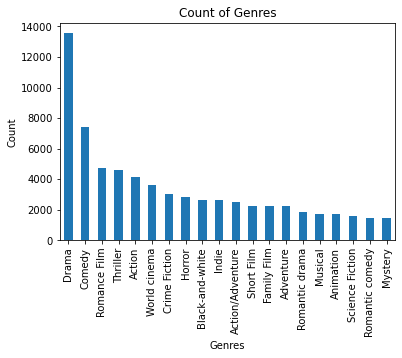

In [351]:
data_summary.plot_genres()

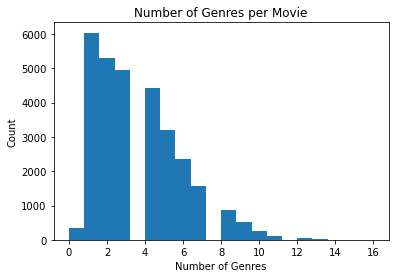

In [352]:
data_summary.plot_n_genres_per_movie()

In [353]:
class DataProcessor:

    def __init__(self, df: pd.DataFrame, create_eval=False):
        self.df = df
        self.multilabel_binarizer = MultiLabelBinarizer
        self.X_train, self.X_eval, self.X_test = pd.DataFrame, pd.DataFrame, pd.DataFrame
        self.y_train, self.y_eval, self.y_test = [], [], []

        self.__create_eval = create_eval

        self.__calc()

    def __calc(self):
        self.__clean_data()
        self.__process_y()
        self.__split_data()

    def __clean_data(self):
        self.df = self.df.dropna(subset=['genres'])

    def __process_y(self):
        self.multilabel_binarizer = MultiLabelBinarizer()
        self.multilabel_binarizer.fit(self.df['genres'])

    def __split_data(self):
        y = self.multilabel_binarizer.transform(self.df['genres'])
        X = self.df['plot_summary']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        if self.__create_eval:
            self.X_train, self.X_eval, self.y_train, self.y_eval = train_test_split(X, y, test_size=0.2, random_state=42)




In [354]:
data_processor = DataProcessor(data.df)

In [355]:
class TextPreprocessor:
    def __init__(self):
      self.__X = None
      self.__vectorizer = None

    def preprocess(self, X, is_train=False):
      self.__X = X

      self.__clean_text()
      self.__lowercase()
      self.__tokenize()
      self.__remove_stopwords()
      self.__handle_negations()
      self.__lemmatize()
      self.__vectorize(is_train)

      return self.__X

    def __clean_text(self):

      def clean_one_obs(text: str):
          clean_text = re.sub(r'[?|!|\'|"|#|\n|.|,|)|(|\|/|-]', ' ', text)
          clean_text = re.sub(r'[\d]', '', clean_text)
          clean_text = re.sub(' +', ' ', clean_text)
          return clean_text.strip()

      self.__X = self.__X.apply(clean_one_obs)

    def __lowercase(self):
      self.__X = self.__X.str.lower()

    def __tokenize(self):
      self.__X = self.__X.apply(nltk.word_tokenize)

    def __remove_stopwords(self):
      eng_stopwords = set(stopwords.words('english'))
      eng_stopwords.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
      self.__X = self.__X.apply(
          lambda tokens: [token for token in tokens if token not in eng_stopwords]
      )

    def __handle_negations(self):
      self.__X = self.__X.apply(
          lambda tokens: ['_'.join(tokens[i:i+2]) if tokens[i] == 'not' else tokens[i] for i in range(len(tokens))]
      )

    def __lemmatize(self):
      lemmatizer = WordNetLemmatizer()
      self.__X = self.__X.apply(
          lambda tokens: [lemmatizer.lemmatize(token, pos='v') for token in tokens]  # Consider changing 'v' to the correct POS tag
      )

    def __vectorize(self, is_train):
      self.__X = self.__X.apply(
          lambda tokens: ' '.join(tokens)
      )
      if is_train:
          self.__vectorizer = TfidfVectorizer(strip_accents='unicode',
                                              analyzer='word',
                                              ngram_range=(1,3),
                                              norm='l2',
                                              max_features=2000,
                                              max_df=0.95,
                                              min_df=0.01)
          self.__vectorizer.fit(self.__X)

      tfidf_matrix = self.__vectorizer.transform(self.__X)
      self.__X = pd.DataFrame(tfidf_matrix.toarray(), columns=self.__vectorizer.get_feature_names_out())


In [356]:
text_preprocessor = TextPreprocessor()
X_train = text_preprocessor.preprocess(data_processor.X_train, is_train=True)
y_train = data_processor.y_train

X_test = text_preprocessor.preprocess(data_processor.X_test)
y_test = data_processor.y_test

In [383]:
class GenrePredictionModel:
    def __init__(self):
        self.model = OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)

        self.classes = None

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        self.classes = self.model.classes_

    def predict(self, X):
        y_pred_proba = self.model.predict_proba(X)
        # Create a DataFrame from probabilities and classes
        df_proba = pd.DataFrame(y_pred_proba, columns=self.classes)
        # Sort genres by probability for each movie
        sorted_proba = df_proba.apply(lambda row: sorted(zip(self.classes, row), key=lambda x: x[1], reverse=True), axis=1)
        return sorted_proba

    def evaluate(self, X, y):
        y_pred = self.model.predict(X)
        precision = precision_score(y, y_pred, average='samples')
        recall = recall_score(y, y_pred, average='samples')
        f1 = f1_score(y, y_pred, average='samples')
        hamming = hamming_loss(y, y_pred)

        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1 Score: {f1}')
        print(f'Hamming Loss: {hamming:.4f}')

        y_pred_proba = self.model.predict_proba(X)

        # Handle classes with only one present label
        roc_auc_scores = []
        for i in range(y.shape[1]):
            try:
                roc_auc = roc_auc_score(y[:, i], y_pred_proba[:, i])
                roc_auc_scores.append(roc_auc)
            except ValueError:
                continue

        if len(roc_auc_scores) > 0:
            avg_roc_auc = np.mean(roc_auc_scores)
        else:
            avg_roc_auc = np.nan

        print(f"Average ROC AUC Score across all classes: {avg_roc_auc}")


In [387]:
model = GenrePredictionModel()
model.fit(X_train, y_train)

C:\Users\bar.schwartz\Anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 51 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
C:\Users\bar.schwartz\Anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 154 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
C:\Users\bar.schwartz\Anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 211 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
C:\Users\bar.schwartz\Anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 262 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
C:\Users\bar.schwartz\Anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 324 is present in all training examples.
  "Label %s is present in all

In [388]:
model.evaluate(X_train, y_train)

C:\Users\bar.schwartz\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.5570449643971614
Recall: 0.27487242341916795
F1 Score: 0.333651790615101
Hamming Loss: 0.0085
Average ROC AUC Score across all classes: 0.9851905939365626


In [389]:
model.evaluate(X_test, y_test)

C:\Users\bar.schwartz\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.4897196186621048
Recall: 0.23932326036812457
F1 Score: 0.28915258700139596
Hamming Loss: 0.0089
Average ROC AUC Score across all classes: 0.8600057585912362


In [390]:
def predict_genres(plot_summary: str):
    X = text_preprocessor.preprocess(pd.Series([plot_summary], name='plot_summary'))
    pred = model.predict(X).values[0]
    return {data_processor.multilabel_binarizer.classes_[genre_idx]: prob for genre_idx, prob in pred}

In [391]:
plot_summary = "Charlie passes himself off as a rich businessman but gets by through fleecing suckers with 3-Card Monte. Miko is a street kid who spends his time with Charlie instead of going to school; his sister unsuccessfully tries to raise him on her own. The plot follows Charlie's attempts to conquer the heart of Gila, a rich girl whose parents are trying to get her married to an American millionaire, something she doesn't want."

# Charlie and a Half: Comedy, Drama and Romance
predict_genres(plot_summary)

{'Comedy': 0.5982390234702807,
 'Drama': 0.24350332550055148,
 'Black-and-white': 0.22544309220074085,
 'Romance Film': 0.1820992855255764,
 'Romantic comedy': 0.15066143423472608,
 'Indie': 0.12467043900784729,
 'Short Film': 0.12055015889558895,
 'Family Film': 0.09557330980839557,
 'Action': 0.09422931861841667,
 'Comedy film': 0.08378375561409532,
 'Crime Fiction': 0.08326758067286844,
 'Musical': 0.0774120448715912,
 'Comedy-drama': 0.07514853029166194,
 'Silent film': 0.06913328546377322,
 'Black comedy': 0.05121768385409541,
 'Coming of age': 0.04636751748333194,
 'Animation': 0.04192561352961285,
 'Family Drama': 0.03664529991712056,
 'Thriller': 0.03608786197767811,
 'Slapstick': 0.03539514367866715,
 'Romantic drama': 0.03518299895679569,
 'World cinema': 0.035163526068835535,
 'Teen': 0.03384517721789286,
 "Children's/Family": 0.028605876168094554,
 'Mystery': 0.028257915406892112,
 'Action/Adventure': 0.019046232438949713,
 'Horror': 0.018824735943284942,
 'Western': 0.0186

In [393]:
plot_summary = "A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic."

# Titanic: Drama, Romance
predict_genres(plot_summary)

{'Drama': 0.553093355912453,
 'Romance Film': 0.29042550273068884,
 'Comedy': 0.12230260850413445,
 'World cinema': 0.12069547601876747,
 'Black-and-white': 0.10838001906325427,
 'Romantic drama': 0.09074108429006222,
 'Short Film': 0.07397066611123515,
 'Comedy film': 0.07099061455013367,
 'Silent film': 0.0631621403392825,
 'Musical': 0.054952427284874254,
 'Family Film': 0.05371740512967058,
 'Romantic comedy': 0.038881250661521365,
 'Fantasy': 0.034749326121665376,
 'Indie': 0.029994483413307824,
 'Action': 0.02614389188198052,
 'Adventure': 0.02487335755931899,
 'Crime Fiction': 0.022434842738298738,
 'Thriller': 0.02217325698918106,
 'LGBT': 0.018920040409568423,
 'Melodrama': 0.017909201977104668,
 'Chinese Movies': 0.01556962715815681,
 'Comedy-drama': 0.014715160591610963,
 'Documentary': 0.014669531867095685,
 'Animation': 0.014517261759807356,
 'Coming of age': 0.012951355145000579,
 'Action/Adventure': 0.012756370043605083,
 'Bollywood': 0.012075104951916518,
 'Horror': 0.0

---------
# Discussion:

### Model Results
1. The chosen model was One vs Rest, where Logistic Regression was used as the base model. This was selected due to its simplicity and ability to deliver acceptable results for this particular problem. Furthermore, despite One vs Rest strategy creating N models (which might increase prediction runtime), each individual prediction remains relatively quick.
2. Preprocessing was performed using the TF-IDF method, which generated thousands of features. These numerous features can potentially aid the logistic regression model in identifying an optimal hyperplane for class differentiation. Notably, TF-IDF is a straightforward and popular method in NLP, known for its simplicity and effectiveness.
3. On observing the precision, recall, and F1-score, it can be seen that the scores are relatively low. However, this could be slightly misleading as these metrics are based on a default threshold of 0.5 for classifying each genre.
4. Therefore, other relevant metrics should be considered:
    * Hamming Loss: This is calculated as the average fraction of incorrect predictions. In our model, the Hamming loss is relatively low, which is promising.
    * ROC-AUC: This measure evaluates the overall model performance across all thresholds by considering the ratio between the True Positive Rate (TPR) and the False Positive Rate (FPR). The average (simple) ROC-AUC score across all genres in our model is relatively high, suggesting the model performs well in distinguishing between different genres.

### Impact on the User:
The ultimate goal of building this model is to aid users in discovering movies they might be interested in. An accurate and robust genre classification model would have several positive impacts:
1. Improved Discovery: Users can find movies that align with their interests more quickly if the genre labels are accurate. They can explore movies within certain genres and be more confident that the movie aligns with their expectations.
2. User Experience: Having accurately labeled movies also helps create a better user experience. Users can trust the system more, which may lead to increased usage and engagement.
3. Recommendations: If the system knows a user prefers certain genres, then accurate genre prediction can improve the quality of movie recommendations. This personalization can enhance the user's interaction with the service, leading to higher satisfaction.
4. Increased User Engagement: By effectively categorizing movies into genres, users are likely to engage more with the platform. They are more likely to rate and review movies, add them to a watch list, or recommend them to others if the genre classification aligns with their expectations. This increased engagement is beneficial for the platform as it often leads to increased usage and potentially increased revenue.
5. Saving User Time: Users spend a significant amount of time deciding what to watch. A more efficient genre classification system can reduce the time users spend browsing for movies, making the platform more convenient to use.
6. Data Collection for Further Analysis: User interactions based on genre predictions provide valuable data for further analysis. The platform can use this data to identify trends, preferences, and make data-driven decisions to improve the service.

The better the model performs, the more benefits the users and the platform can enjoy. However, a poorly performing model can have the opposite effect, leading to user frustration and decreased platform usage.

## Next Steps:
1. Experiment with Different Models: Try out various types of models, such as different types of neural networks or ensemble methods. This includes:RNN, LSTM, or transformer-based models like BERT (Bidirectional Encoder Representations from Transformers), which have been shown to perform well on text classification tasks.
2. Hyperparameter Tuning: Experiment with different configurations of your existing models. This might involve changing the learning rate, batch size, number of layers, types of activation functions, and other hyperparameters.
3. Feature Engineering: try to engineer more sophisticated features from your text data. For instance, sentiment scores or other linguistic features could be useful.
4. Collect More Data: If possible.
5. Fine-tuning Pretrained Models (Transfer Learning): There are many pre-trained models available that can fine-tune on this specific task.
6. Model Interpretability: To gain more trust in your model, we might want to use techniques to understand why our model is making a certain prediction. This can be done through methods like SHAP or by the model itself (depends if possible).